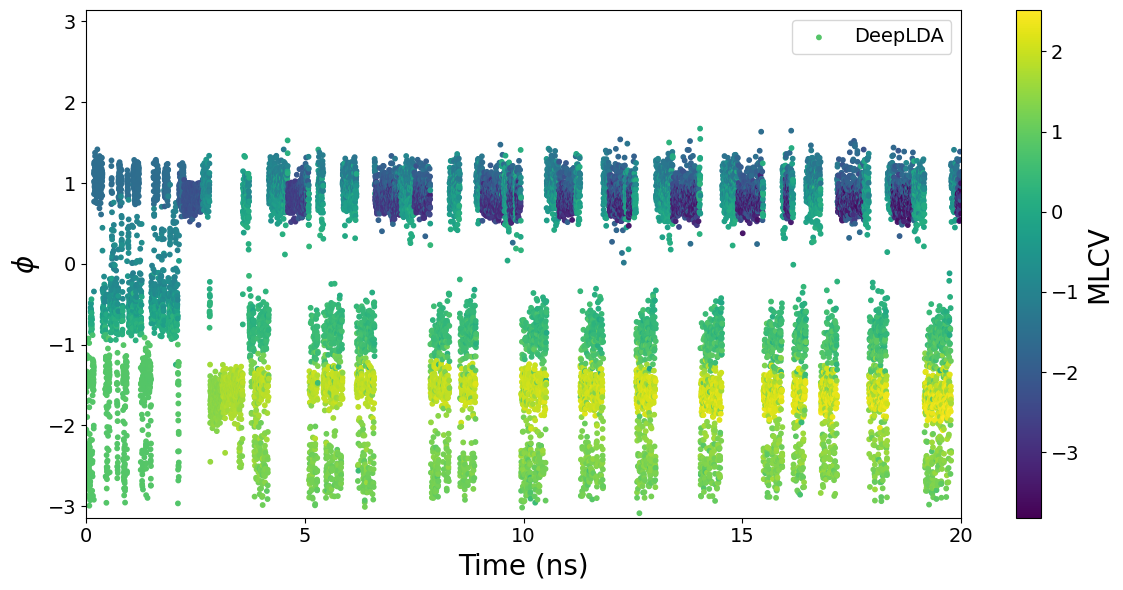

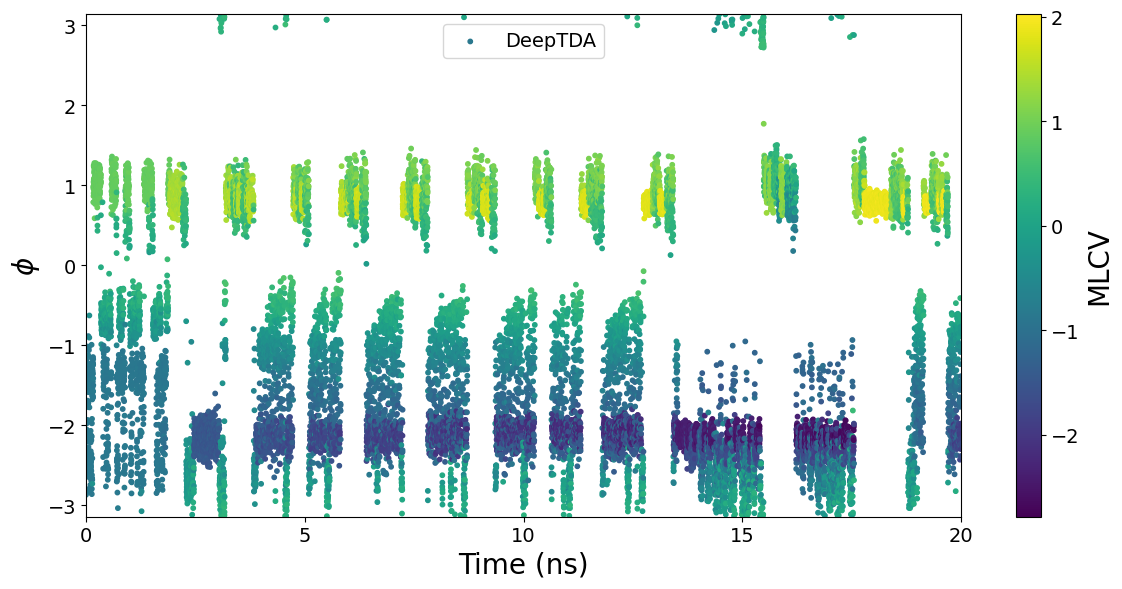

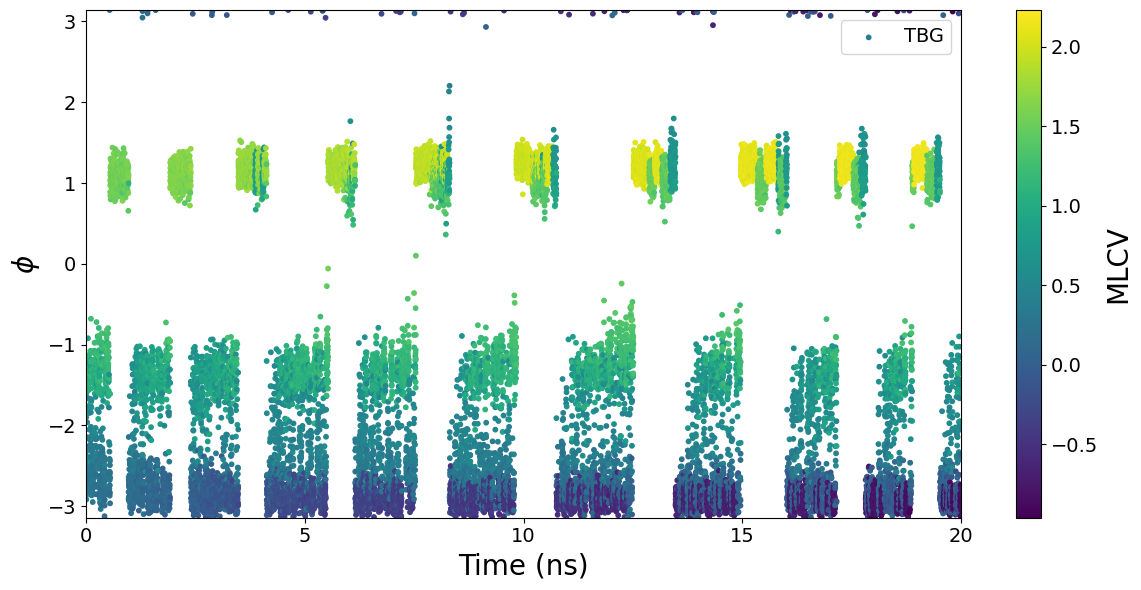

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot(method, ns, cv_dir):
    data = np.loadtxt(cv_dir, comments='#')
    with open(cv_dir, 'r') as file:
        first_line = file.readline().strip()
    keys = first_line.split()[2:]
    phi_idx = keys.index('phi')
    cv_idx = keys.index(cv_name[method])
    phi = data[:, phi_idx]
    cv = data[:,cv_idx]
    time_ns = np.arange(0, 20001) * 0.001  # ns

    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(cv.min(), cv.max())
    colors = cmap(norm(cv))

    plt.figure(figsize=(12, 6))
    scatter=plt.scatter(time_ns, phi, c=colors, s=10, label=f'{method}')
    cbar=plt.colorbar(scatter)
    cbar.set_label(bar_labels[method],fontsize=20, fontweight="medium")
    cbar.ax.tick_params(labelsize=14)
    scatter.set_clim(cv.min(), cv.max())
    plt.xlabel('Time (ns)', fontsize=20, fontweight="medium")
    plt.ylabel(r'$\phi$', fontsize=20, fontweight="medium")

    plt.xlim(0,20)
    plt.ylim(-np.pi,np.pi)
    plt.xticks(np.arange(0, 21, 5),fontsize=14)  
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()
    # plt.savefig(f'../figures/phi_explore_method={method}_ns={ns}.png', dpi=300, bbox_inches="tight")
    plt.savefig(f'../fig/phi_distribution_{method}_{ns}.pdf', dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

ns = '10'

cv_name = {
    # 'ref': 'phi',
    # 'phi': 'phi',
    # 'AE': 'deep.node-0',
    # 'TAE': 'deep.node-0',
    # 'VDE': 'deep.node-0',
    'DeepTDA': 'deep.node-0',
    'DeepLDA': 'deep.node-0',
    # 'DeepTICA': 'deep.node-0',
    'TBG': 'deep.node-0',
}
bar_labels = {
    # 'ref': r'$\phi$',
    # 'phi': r'$\phi$',
    # 'AE': 'MLCV',
    # 'TAE': 'MLCV',
    # 'VDE': 'MLCV',
    'DeepLDA': 'MLCV',
    'TBG': 'MLCV',
    'DeepTDA': 'MLCV',
    # 'DeepTICA': 'MLCV',
}

# methods = ['ref', 'phi', 'AE', 'TAE', 'VDE', 'DeepTDA', 'DeepLDA', 'DeepTICA']
methods = ['DeepLDA', 'DeepTDA', 'TBG']
dates = ['0421154805', '0422051238', '0422033357']
for idx, method in enumerate(methods):
    base_dir = f'/home/shpark/prj-mlcv/lib/enhance/simulations/aldp/{method}/{ns}/log'
    # date = sorted(os.listdir(base_dir))[-1]
    # date = "0422033357"
    date = dates[idx]
    cv_dir = os.path.join(base_dir, date, '0', 'COLVAR')
    plot(method, ns, cv_dir)